In [ ]:
# Colab setup

# Setup NASLib
#%cd /content
#!git clone -b zerocost https://github.com/automl/NASLib/
#!pip install gdown

In [1]:
# Download zc score files
#%cd NASLib
#!source scripts/bash_scripts/download_nbs_zero.sh all
#%cd ..

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from zc_combine.utils.naslib_utils import parse_scores, load_search_space
from zc_combine.ensemble.filter import common_n_largest, filter_by_zc_task
from zc_combine.utils.plot_utils import plot_common_networks, plot_accuracy_histogram, plot_top_quantile_zc, plot_networks_zc
from zc_combine.ensemble.eval import eval_zc

naslib_path = '../zero_cost/NASLib'

# Transbench101 macro

In [3]:
what = 'zc_transbench101_macro'

zc_transbench101_macro = load_search_space(naslib_path, what)

In [4]:
dfs = parse_scores(zc_transbench101_macro)

Some tasks share only few best networks or none!

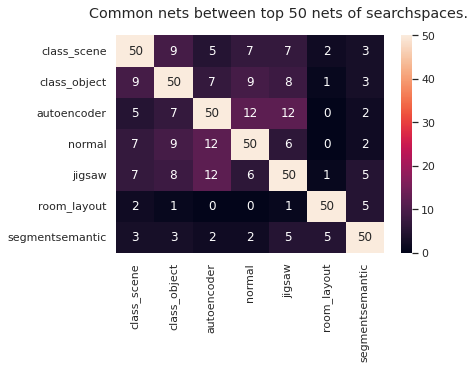

In [19]:
n_largest = 50
inds, common_nets = common_n_largest(dfs, n_largest=n_largest)

plot_common_networks(common_nets, inds, n_largest=n_largest)
plt.show()

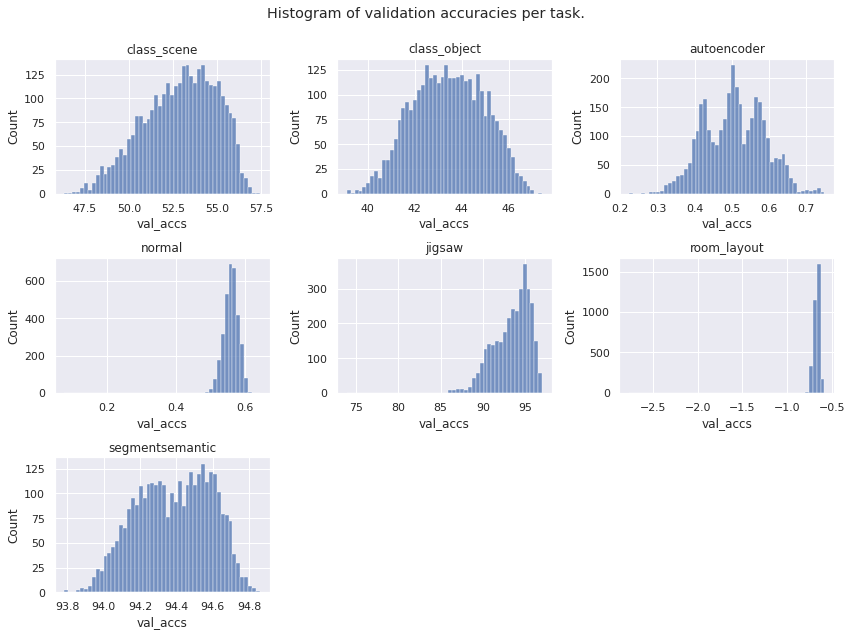

In [23]:
plot_accuracy_histogram(dfs)
plt.show()

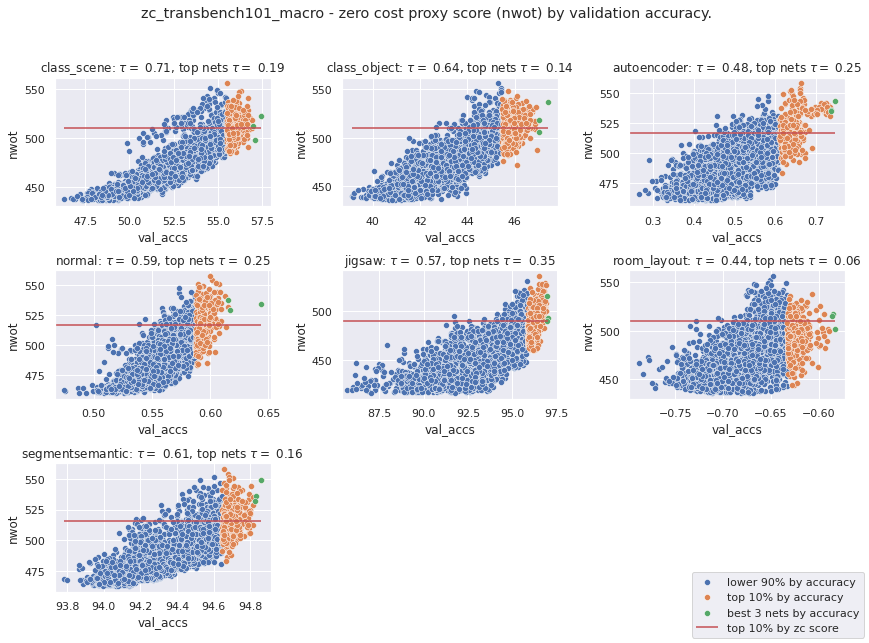

In [86]:
zc = 'nwot'

top_k = 3
acc_quantile = 0.9
zc_quantile = 0.9
dfs_stats = eval_zc(dfs, zc, top_k=top_k, acc_quantile=acc_quantile)

q = int(100 - acc_quantile * 100)
low_q = int(acc_quantile * 100)
zc_q = int(100 - zc_quantile * 100)

title = f"{what} - zero cost proxy score ({zc}) by validation accuracy."
legend = [f'lower {low_q}% by accuracy', f'top {q}% by accuracy', f'best {top_k} nets by accuracy', f'top {zc_q}% by zc score']
plot_networks_zc(dfs_stats, zc, title, top_line=True, subplots_adjust=0.87, legend=legend, legend_loc='lower right', zc_quantile=zc_quantile)
plt.show()

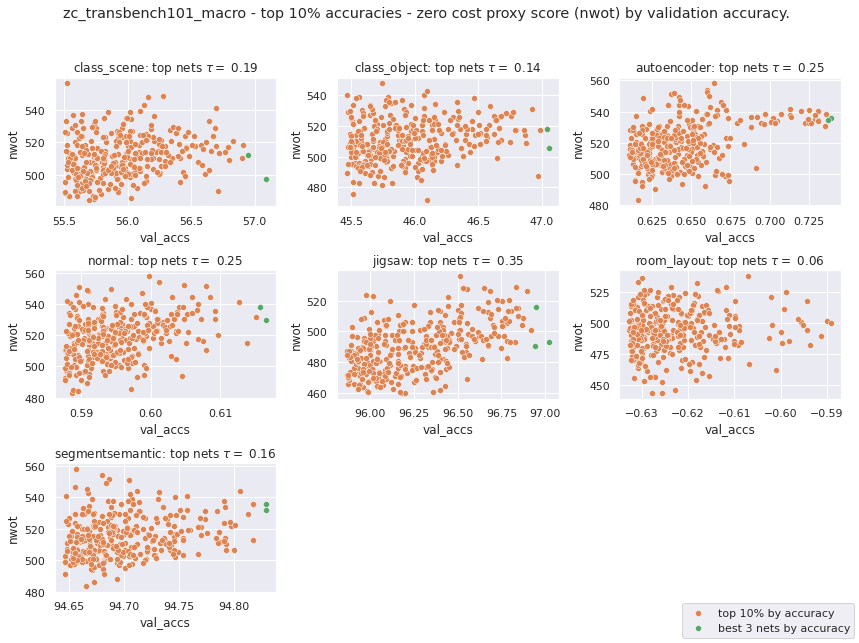

In [92]:
title = f"{what} - top {q}% accuracies - zero cost proxy score ({zc}) by validation accuracy."
legend = [f'top {q}% by accuracy', f'best {top_k} nets by accuracy']
plot_top_quantile_zc(dfs_stats, zc, title, subplots_adjust=0.87, legend=legend, legend_loc='lower right', zc_quantile=zc_quantile)
plt.show()

# Combine two proxies

In [89]:
def plot_filtered(dfs, filter_zc, rank_zc, **kwargs):
  dfs_filter = filter_by_zc_task(dfs, filter_zc, **kwargs)
  dfs_filtered = eval_zc(dfs, rank_zc, filter_index=dfs_filter)

  title = f"Nets over 90% quantile in {filter_zc}, {rank_zc} by validation accuracy."
  legend = [f'lower 90% nets by accuracy', f'top 10% nets by accuracy', 'best 3 networks']
  plot_networks_zc(dfs_filtered, rank_zc, title, subplots_adjust=0.9, legend=legend, legend_loc='lower right')
  plt.show()

## Combine fisher and nwot

- fisher does not rank well top 10 % networks

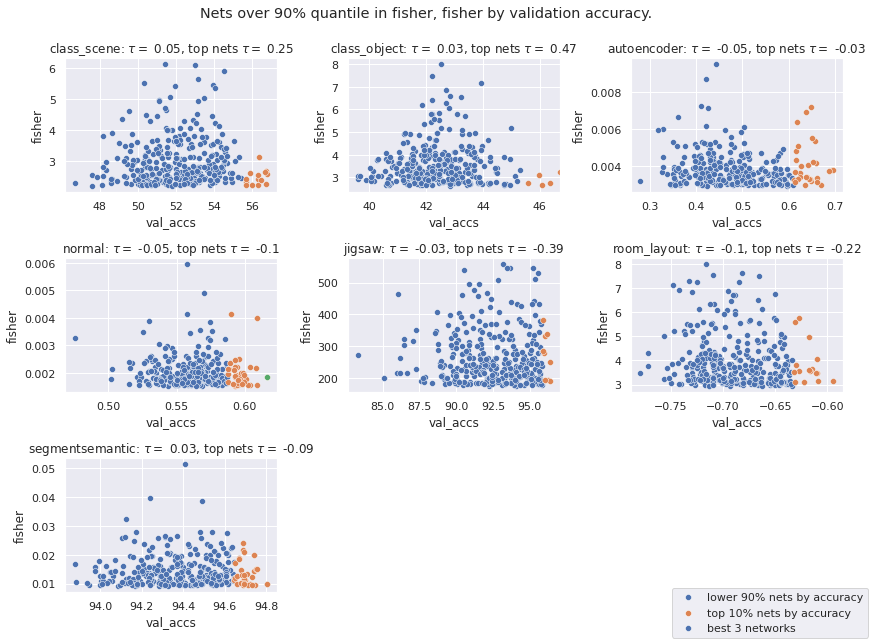

In [94]:
plot_filtered(dfs, 'fisher', 'fisher')

- nwot is slightly better

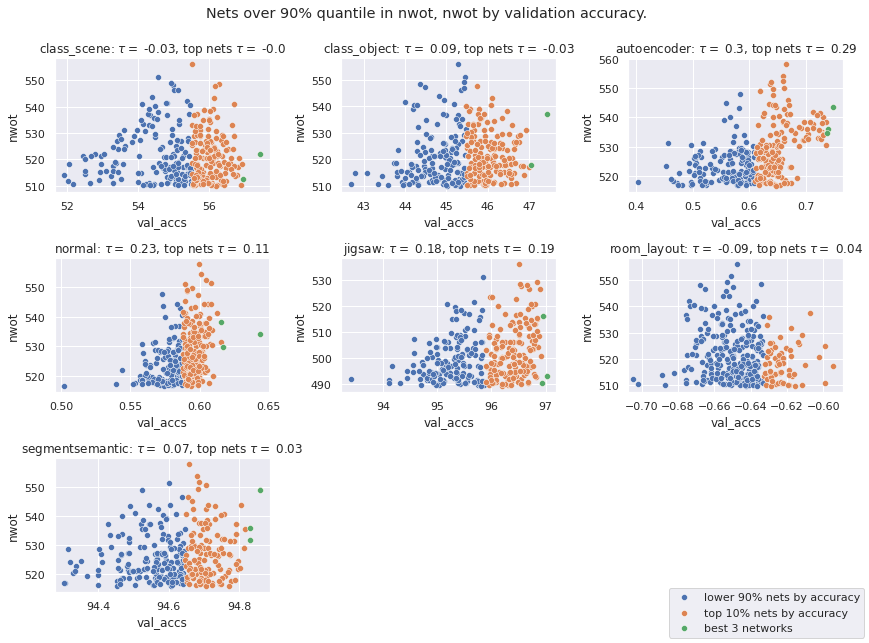

In [93]:
plot_filtered(dfs, 'nwot', 'nwot')

- select top 10 % networks using fisher
- rank them using nwot
- performance is much better
   - compare with the fisher-fisher case above

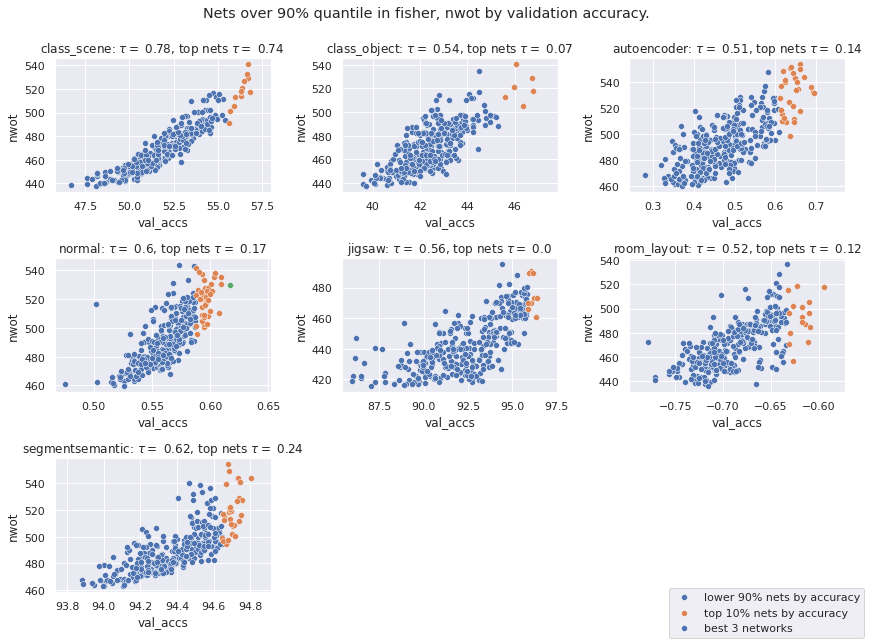

In [80]:
plot_filtered(dfs, 'fisher', 'nwot')

- reversing the proxies leads to worse results

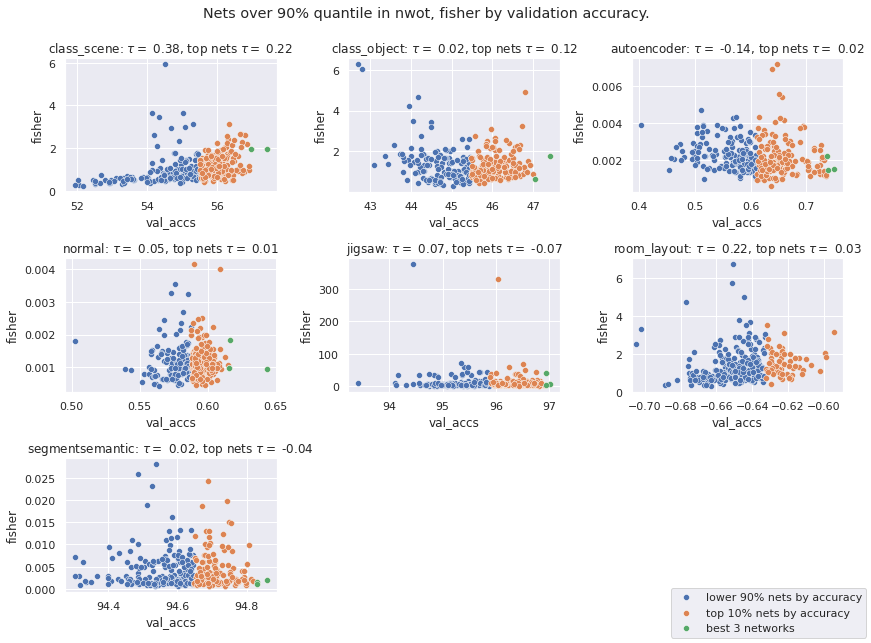

In [97]:
plot_filtered(dfs, 'nwot', 'fisher')

## Filter using multiple proxies

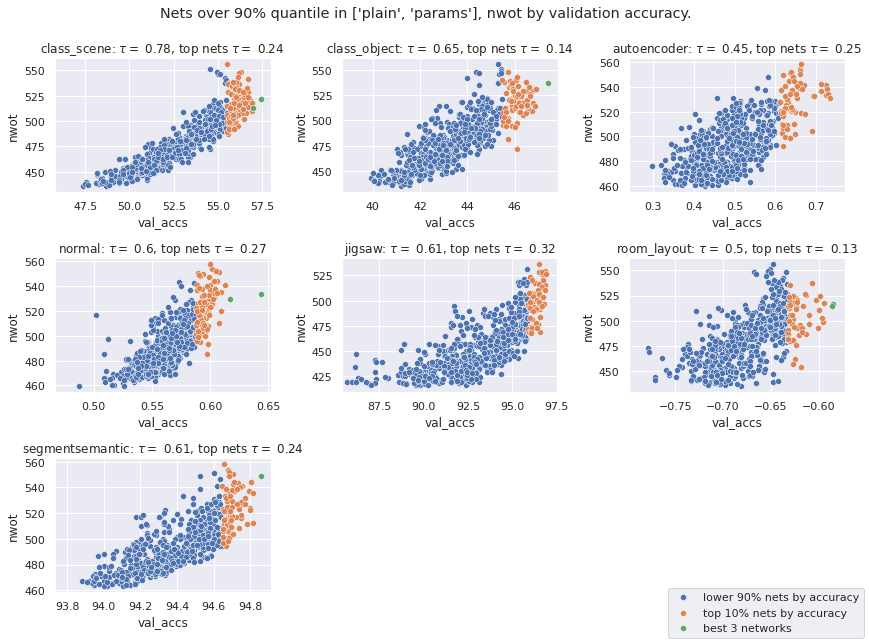

In [83]:
plot_filtered(dfs, ['plain', 'params'], 'nwot', mode='u')

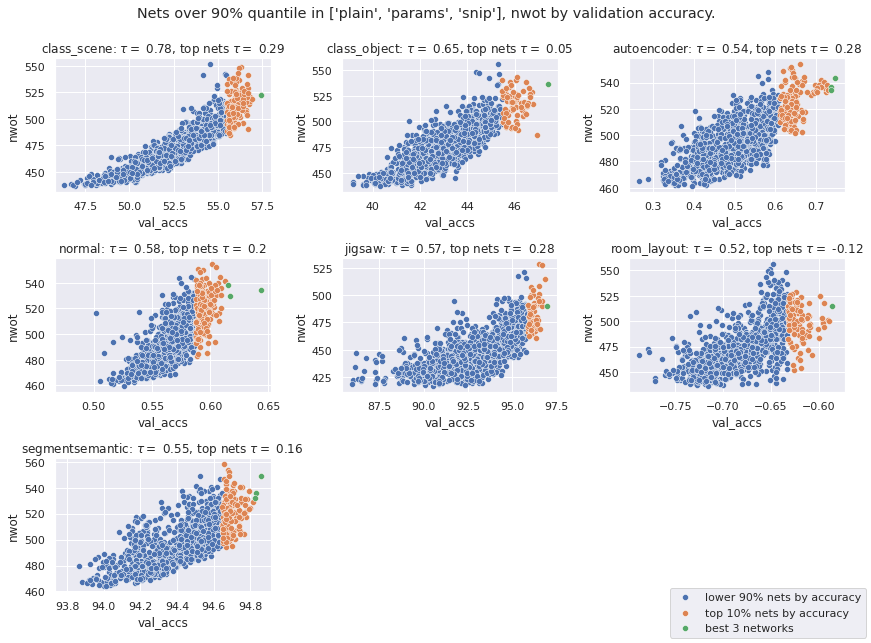

In [84]:
plot_filtered(dfs, ['plain', 'params', 'snip'], 'nwot', mode='s', quantile=[0.3, 0.3, 0.3])

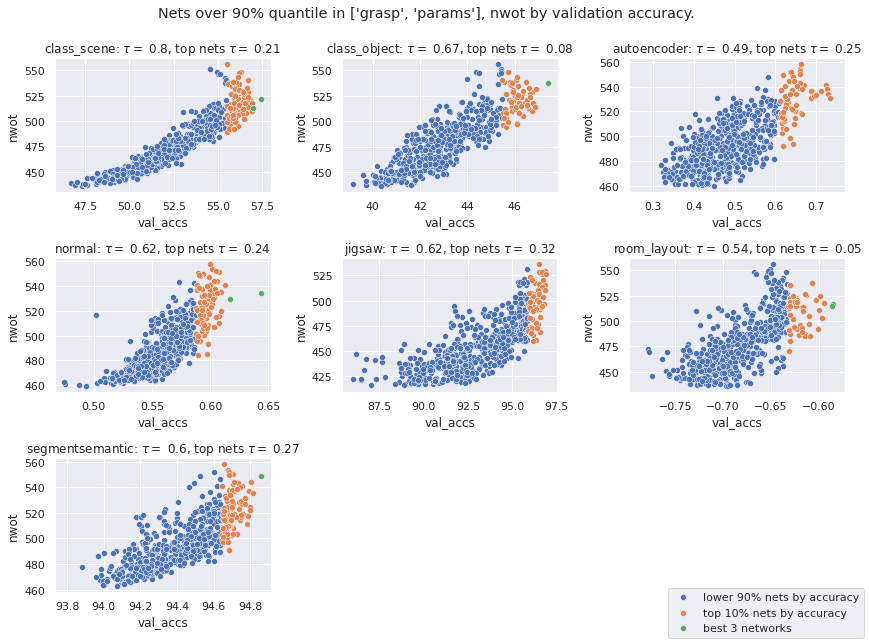

In [85]:
plot_filtered(dfs, ['grasp', 'params'], 'nwot', mode='u')

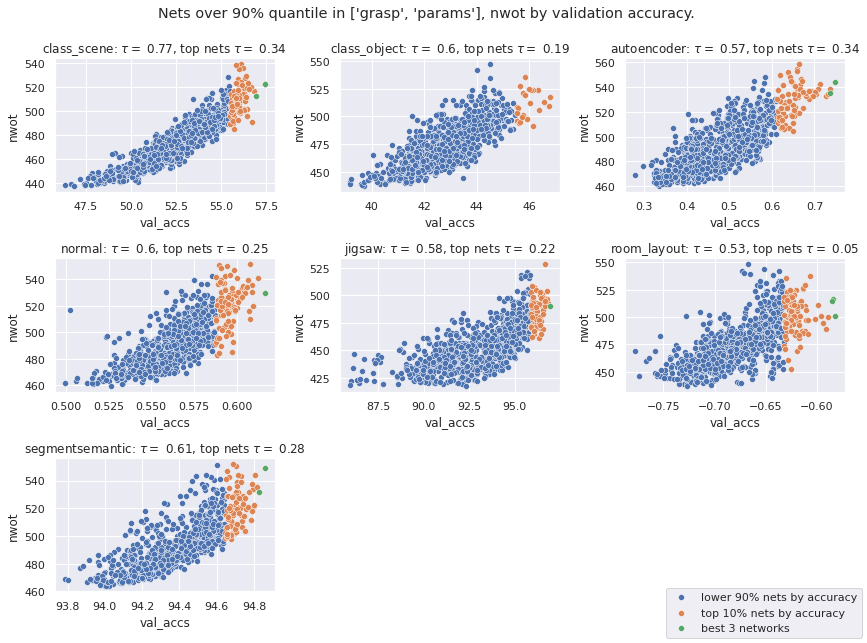

In [96]:
plot_filtered(dfs, ['grasp', 'params'], 'nwot', mode='i', quantile=0.5)